## PROJECTS TO BE GIVEN - **DATA SCIENCE**

# ABOUT **PROJECT** -
Determine based on **sepal length**, **sepal width**, **petal length**, and **petal width** flower species name.

### Use this data to determine.
**1. Segregate features and classes.**

**2. Split the data into train and test.**

**3. Train the RandomForestClassifier and LogisticRegression**

**4. Compare the accuracy of each model.**

**5. Show by running inference for features to determine a flower species.**

# 1. Segregate **features** and **classes**

## 1.1 **Importing Libraries**

In [2]:
# Numpy for Calculation
import numpy as np

# Pandas for CSV file and Analysis
import pandas as pd

# Matplotlib and Seaborn for plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas Plotting for plotting Parallel Cordinates of Dataset
from pandas.plotting import parallel_coordinates

# Train_test_split for splitting the dataset
from sklearn.model_selection import train_test_split

# These are my Algorithms which I will use to train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For  Scalling
from sklearn.preprocessing import StandardScaler

# This is for checking the Accuracy of the Model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For making pipeline for the model
from sklearn.pipeline import make_pipeline

# For ignore Warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## 1.2 **Loading Dataset**

In [190]:
path = r'/content/drive/MyDrive/Colab Notebooks/Datasets/Machine Learning Datasets/Iris Dataset/Iris.csv'
data = pd.read_csv(path)
data1 = data.copy()
flower_mapping = {
    'Iris-setosa': 0,
    'Iris-virginica': 1,
    'Iris-versicolor': 2
}

data['Species'] = data['Species'].map(flower_mapping)

## 1.3 **Checking** how my data is **looking** like

I am using **sample()** function instead of **head()** function, because in the **head()** function output be the **first five rows of dataset**. But in **sample()** function it **returns random five row of data**. So it is **very usefull to understanding the data**.

In [4]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,92,6.1,3.0,4.6,1.4,2
4,5,5.0,3.6,1.4,0.2,0
50,51,7.0,3.2,4.7,1.4,2
134,135,6.1,2.6,5.6,1.4,1
21,22,5.1,3.7,1.5,0.4,0


## 1.4 **Gaining Information from Data**

### About **Columns** of Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


#### **Observations** -
1. We have total **Six columns**.
2. **Id column** is **not important** for our data, **so I will drop that**.
3. **Four columns** are **usefull** those names are -
  - **SepalLengthCm**
  - **SepalWidthCm**
  - **PetalLengthCm**
  - **PetalWidthCm**
  - **Species**

In [6]:
data = data.drop(columns=['Id'])

## 1.5 **Checking** for **Null Values**

In [7]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### **Observations** -
1. As we can see **there are no null values present** in our dataset.

## 1.6 **Statistical** Insight for **Numerical** Columns

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### **Observations** -
##### 1. **Mean Values** :      
-  SepalLengthCm = 5.84
-  SepalWidthCm = 3.05
-  PetalLengthCm = 3.75
-  PetalWidthCm = 1.19

##### 2. **Standard Deviation** :    
-  SepalLengthCm = 0.82
-  SepalWidthCm = 0.43
-  PetalLengthCm = 1.76
-  PetalWidthCm = 0.76

##### 3. **Minimum Values** :     
-  SepalLengthCm = 4.3
-  SepalWidthCm = 2.0
-  PetalLengthCm = 1.0
-  PetalWidthCm = 0.1

##### 4. **Maximum Values** :       
-  SepalLengthCm = 7.9
-  SepalWidthCm = 4.4
-  PetalLengthCm = 6.9
-  PetalWidthCm = 2.5

## 1.8 **Checking** For **Duplicate** Entries

In [9]:
print("Duplicate Values of Dataset : ",data.duplicated().sum(),"\n")
print("\t\t\tDataFrame of Those Values")
data[data.duplicated()]

Duplicate Values of Dataset :  3 

			DataFrame of Those Values


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,1


#### **Observations** -
- As we can see there are **No Null values** are **present** in my dataset

## 1.9 **Checking** the **Balance** of the Data

In [10]:
data['Species'].value_counts()

0    50
2    50
1    50
Name: Species, dtype: int64

#### **Observations** -
- **Each species** have **equal number of data.**
- So my data is **Balanced**. I can use this for further uses.

## 1.10 **EDA (** Exploratory Data Analysis **)** 

### Species Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


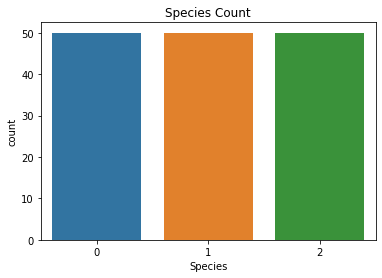

In [11]:
plt.title('Species Count')
sns.countplot(data['Species'])

## Uni-Variate Analysis
**Comparison between various species based on sepal length and width**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 8 Text major ticklabel objects>)

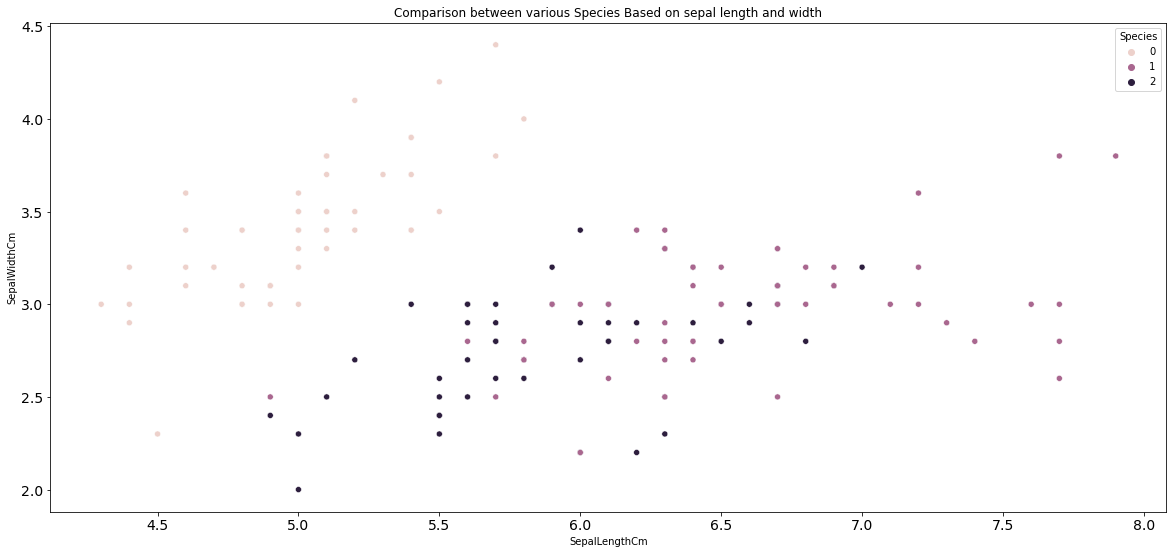

In [12]:
plt.figure(figsize=(20,9))
plt.title('Comparison between various Species Based on sepal length and width')
sns.scatterplot(data['SepalLengthCm'], data['SepalWidthCm'], hue=data['Species'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#### **Observations** -
1. **Sepal_Width** -
  -  **Iris_Versicolor**. has Smaller Sepal Lenth and Larger Sepal Width.
  - **Iris_Virginica** has average Sepal Width and Sepal Length.
  - **Iris_Setosa** has Larger Sepal Length and Smaller Sepal Width from **Iris_Satosa**.

**Comparison between various species based on petal length and width**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 8 Text major ticklabel objects>)

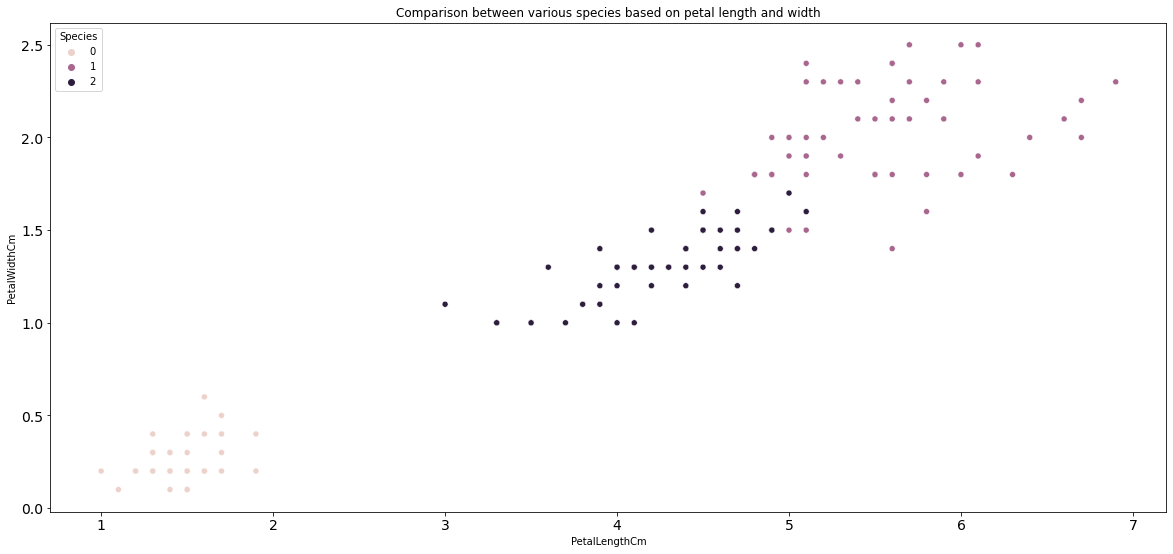

In [13]:
plt.figure(figsize=(20,9))
plt.title("Comparison between various species based on petal length and width")
sns.scatterplot(data['PetalLengthCm'], data['PetalWidthCm'], hue=data['Species'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#### **Observations** -
1. **Setosa species** have the smallest petal length as wellas petal width.
2. **Versicolor species** have average petal length and petal width.
3. **Virginica species** have the highest petal length as well as petal width.

## Uni-Variate Analysis

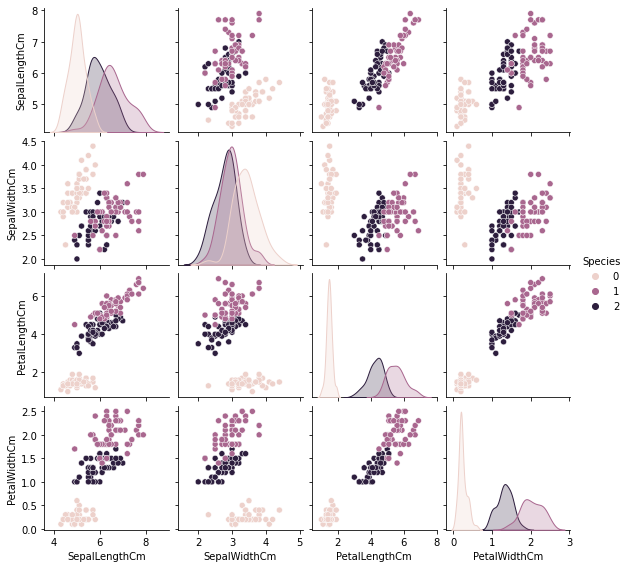

In [14]:
sns.pairplot(data, hue='Species', height=2)

#### **Observations** -
1. **High co-relation** between **petal length and petal width columns**.
2. **Setosa** has both low petal length and petal width.
3. **Versicolor** has average petal length and petal width.
4. **Virginica** has maximum petal length and petal width.

## 1.11 **Heatmap for Co-relation**

[]

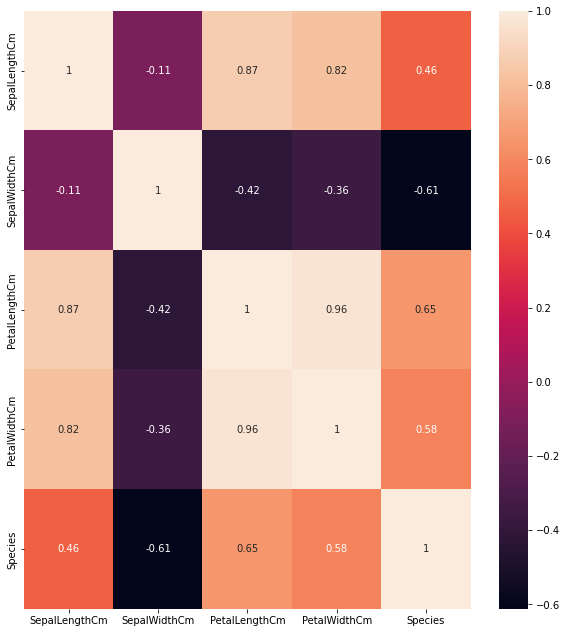

In [15]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(), annot=True)
plt.plot()

#### **Observations** -
1. **Sepal length and Sepal Width** features are **slightly correlated** with each other

## 1.12 **Mean**, **Median** and **Mode** for each Species

In [16]:
data.groupby('Species').agg(['mean', 'median'])

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                 mean median         mean median          mean median   
Species                                                                 
0               5.006    5.0        3.418    3.4         1.464   1.50   
1               6.588    6.5        2.974    3.0         5.552   5.55   
2               5.936    5.9        2.770    2.8         4.260   4.35   

        PetalWidthCm         
                mean median  
Species                      
0              0.244    0.2  
1              2.026    2.0  
2              1.326    1.3

## 1.13 **Visualizing the Distribution, mean and median using Box plots & Violin plots**

**Box plot** to see how the **categories feature Species is distributed** with all other **four inputs variables**

**Box plots to know about Distribution**

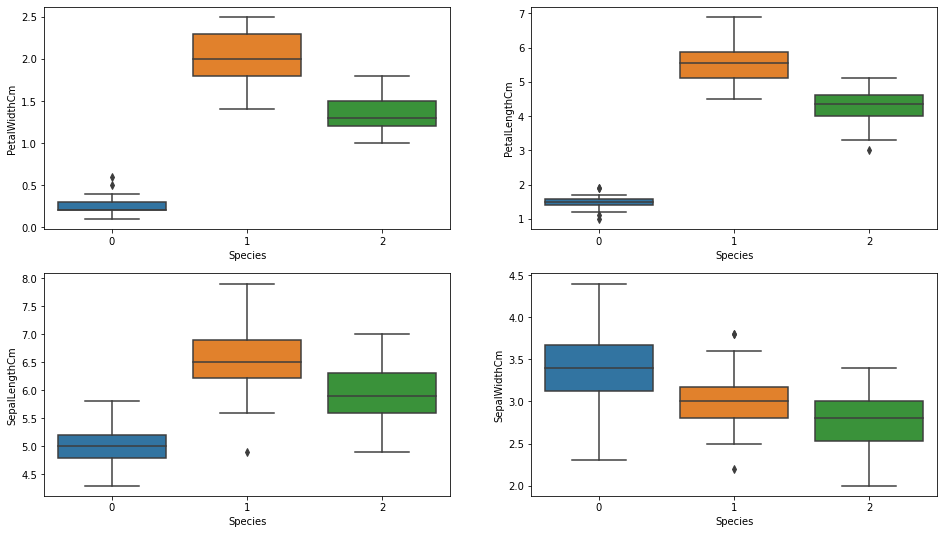

In [17]:
fig,axes = plt.subplots(2,2,figsize=(16,9))
sns.boxplot(data = data, x='Species', y='PetalWidthCm', orient='v', ax = axes[0,0])
sns.boxplot(data = data, x='Species', y='PetalLengthCm', orient='v', ax=axes[0,1])
sns.boxplot(data=data, x='Species', y='SepalLengthCm', orient='v', ax=axes[1,0])
sns.boxplot(data=data, x='Species', y='SepalWidthCm', orient='v', ax=axes[1,1])
plt.show()

#### **Observations** -
1. **Setosa** is having smaller feature and less distributed.
2. **Versicolor** is distributed in a average manner and average features.
3. **Virginica** is highly distributed with large no of values and features.
4. Clearly the mean/ median values are being shown by each plots for various features(**sepal length & width, petal length & width**)

## 1.14 **Violin Plot** for checking distribution

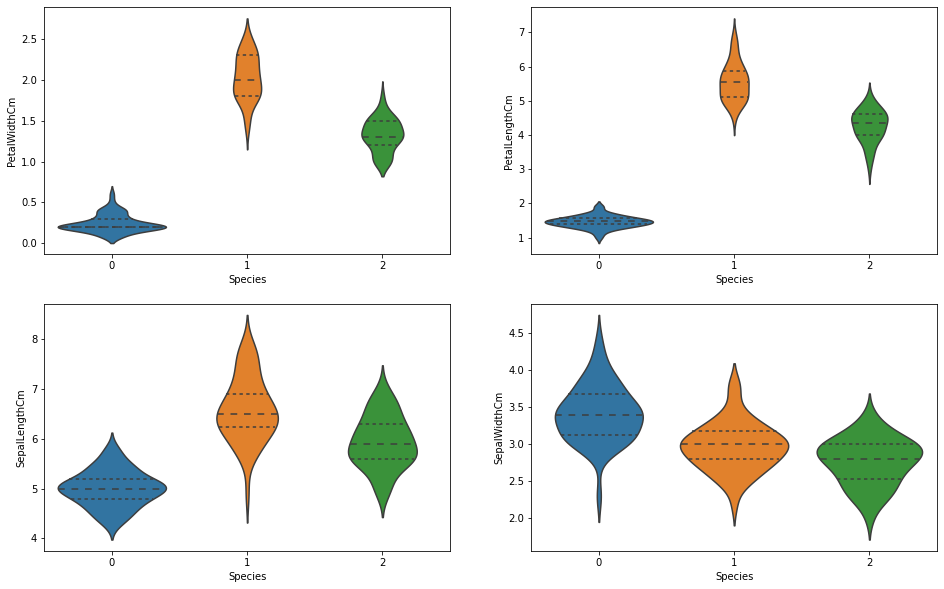

In [18]:
fig, axes = plt.subplots(2,2, figsize=(16,10))
sns.violinplot(data=data, x='Species', y='PetalWidthCm', orient='v', ax=axes[0,0], inner='quartile')
sns.violinplot(data=data, x='Species', y='PetalLengthCm', orient='v', ax=axes[0,1], inner='quartile')
sns.violinplot(data=data, x='Species', y='SepalLengthCm', orient='v', ax=axes[1,0], inner='quartile')
sns.violinplot(data=data, x='Species', y='SepalWidthCm', orient='v', ax=axes[1,1], inner='quartile')
plt.show()

## 1.15 **Plotting the Histogram & Probability Density Function (PDF)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

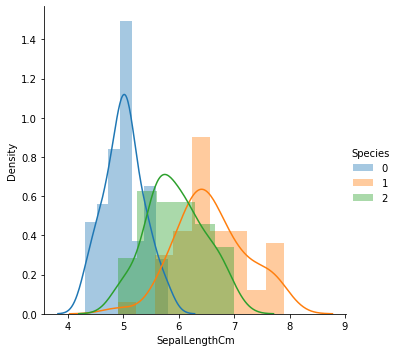

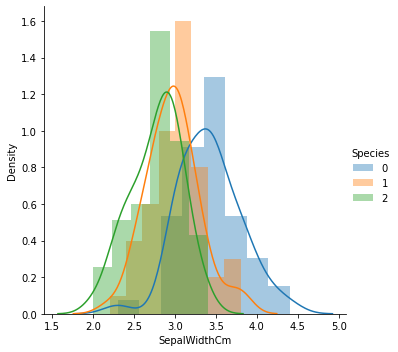

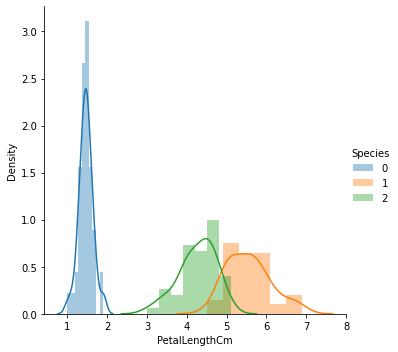

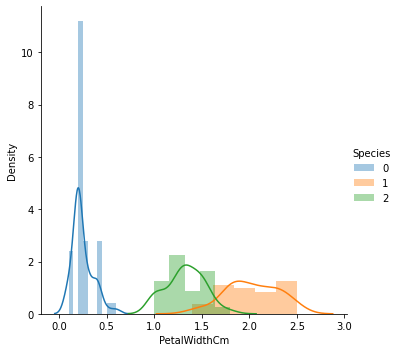

In [19]:
sns.FacetGrid(data, hue='Species', height=5).map(sns.distplot, 'SepalLengthCm').add_legend()
sns.FacetGrid(data, hue='Species', height=5).map(sns.distplot, 'SepalWidthCm').add_legend()
sns.FacetGrid(data, hue='Species', height=5).map(sns.distplot, 'PetalLengthCm').add_legend()
sns.FacetGrid(data, hue='Species', height=5).map(sns.distplot, 'PetalWidthCm').add_legend();

#### **Observations** -
1. Plot 1 Shows that there is a significant amount of overlap between the species on sepal length, so it is not an effective Classification feature.
2. Plot 2 shows that there is even higher overlap between the species on sepal width, so it is not an effective Classification feature.
3. Plot 3 shows that petal length is a good Classification feature as it clearly separates the species. The overlap is extremely less (between Versicolor and Virginica), Setosa is well seperated from the rest two.
4. Just like Plot 3, Plot 4 also shows that petal width is a good Classification feature. The overlap is significantly less (between Versicolor and Virginica) Setosa is well Separated from the rest two.

## 1.16 **Choosing Plot 3 (Classification Feature as Petal Length) to distinguish among the Species.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

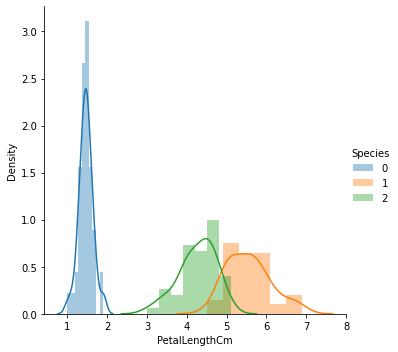

In [20]:
sns.FacetGrid(data, hue='Species', height=5).map(sns.distplot, 'PetalLengthCm').add_legend()

#### **Observations** -
1. The PDF curve of Iris Setosa ends roughly at 2.1.
2. If **petal lengh < 2.1**, then species is **Iris-Setosa**.
3. The point of intersection between PDF curve of **Versicolor** and **Virginica** is roughly at **4.8**.
4. If **Petal Length > 2.1 and Petal Length < 4.8**, then species is **Iris-Versicolor**.
5. If **Petal Length > 4.8**, then species is **Iris-Virginica**.

## For more **Clearly seing**, mostly which **Feature** is **Helping** for **Predictions**

## 1.17 **Parallel Co-ordinated Plot** 
**Which represents each sample as a line**

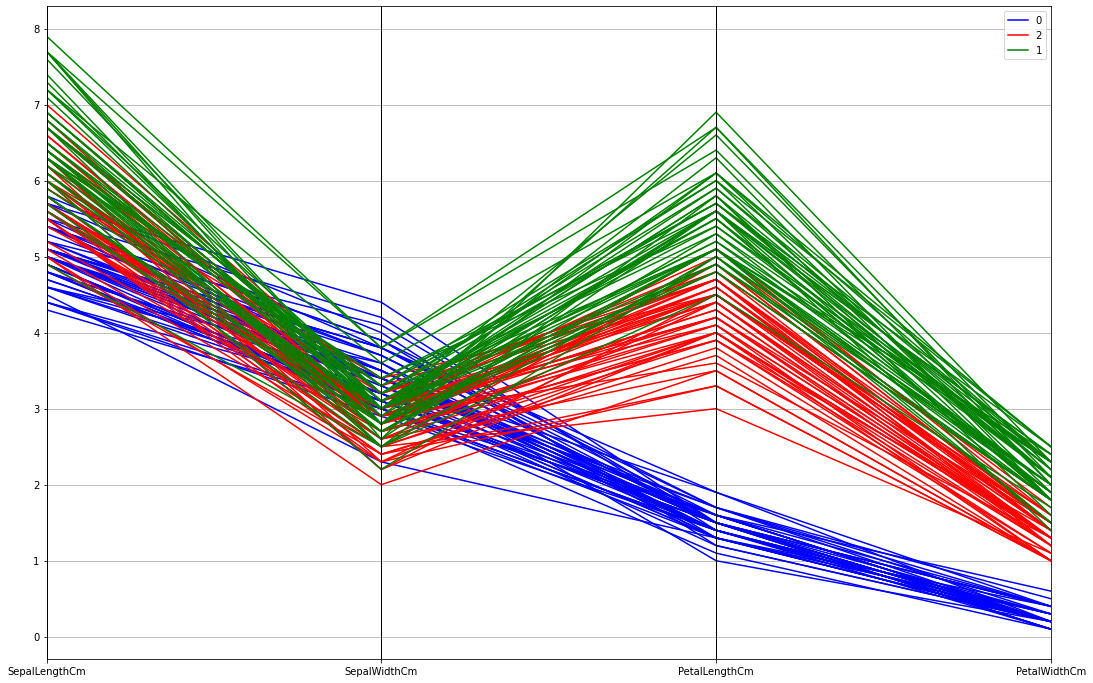

In [21]:
plt.figure(figsize=(18,12))
parallel_coordinates(data, 'Species', color=['blue', 'red', 'green']);

#### **Observations** -
As we have seen before, **Petal Length** measurements can **separate species better than the sepal ones**.

# 2. **Spliting** the Data into **Train** and **Test**

### 2.1 **Spliting** Data into **X** and **Y**

In [118]:
df = data.copy()

X = data.drop(columns=['Species','PetalWidthCm'], axis=1)
y = data['Species']

## 2.2 **Spliting** int **Train** and **Test**

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 2.3 Seing the **Shape** of **Train** and **Test**

In [120]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (105, 3)
Shape of X_test :  (45, 3)
Shape of y_train :  (105,)
Shape of y_test :  (45,)


# 3. **Model Training**

## 3.1 **Logistic Regression** and **Random Forest Classifier**

In [122]:
# Creating the Model Objects
# LogisticRegression
LR_model = LogisticRegression(random_state=42)

# RandomForestClassifier
RFC_model = RandomForestClassifier()



## 3.2 **LogisticRegression**

Now I am going to make a **pipeline** for my **Logistic Regression Model**, so we can **easily predict new inputs**.

In [123]:
LR_model_base = LR_model
LR_model_base.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [124]:
y_pred_train_lr_base = LR_model_base.predict(X_train)
y_pred_test_lr_base = LR_model_base.predict(X_test)

In [125]:
print("Training Accuracy : ",accuracy_score(y_pred_train_lr_base, y_train))
print("Testing Accuracy : ",accuracy_score(y_pred_test_lr_base, y_test))

Training Accuracy :  0.9333333333333333
Testing Accuracy :  1.0


**For Training I am getting 93% Accuracy**

**For Testing I am getting 100% Accuracy**

## 3.3 **Hyperparameter Tunning** for Logistic Regression

In [157]:
param_grid = [
        {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
         'C' : np.logspace(-4, 4, 20),
         'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'saga'],
         'max_iter' : [100, 1000, 2500, 5000]
        }
]

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
clf = GridSearchCV(LR_model, param_grid, cv = 5, verbose=True, n_jobs=1)

In [ ]:
best_clf = clf.fit(X_train, y_train)

In [161]:
best_clf.best_estimator_

LogisticRegression(C=1.623776739188721, penalty='l1', random_state=42,
                   solver='saga')

**These are my best Parameters**.

## 3.4 **Now I am going to use those Parameters**
**Also updating those parameters**

In [165]:
LR_model_final = LogisticRegression(penalty='l1', C=0.623, random_state=42, solver='saga', max_iter=10000)
LR_model_final.fit(X_train, y_train)

LogisticRegression(C=0.623, max_iter=10000, penalty='l1', random_state=42,
                   solver='saga')

In [166]:
y_pred_train_lr_final = LR_model_final.predict(X_train)
y_pred_test_lr_final = LR_model_final.predict(X_test)

In [167]:
train_acc_LR = accuracy_score(y_pred_train_lr_final, y_train)*100
test_acc_LR = accuracy_score(y_pred_test_lr_final, y_test)*100

print("Training Accuracy : ", train_acc_LR)
print("Testing Accuracy : ", test_acc_LR)

Training Accuracy :  94.28571428571428
Testing Accuracy :  100.0


**After doing Hyperparameter Tunning My Training Accuracy has increased 92% to 94%**

## 3.5 **RandomForestClassifier**

In [38]:
RFC_model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_rfc = RFC_model.predict(X_test)

In [40]:
accuracy_score(y_rfc, y_test)*100

97.77777777777777

**My Random Forest Classifier Model Accuracy is 97%**

## 3.6 **Hyperparameter Tunning** For RandomForestClassifier

In [41]:
param_grid_rfc = [
        {'n_estimators' : [100, 300, 500, 800, 1200],
         'max_depth' : [5, 8, 15, 25, 30],
         'min_samples_split' : [2, 5, 10, 15, 100],
         'min_samples_leaf' : [1, 2, 5, 10]
        }
]

In [42]:
best_rfc = GridSearchCV(RFC_model, param_grid_rfc, cv=3, verbose=1, n_jobs=-1)

In [43]:
best_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [5, 8, 15, 25, 30],
                          'min_samples_leaf': [1, 2, 5, 10],
                          'min_samples_split': [2, 5, 10, 15, 100],
                          'n_estimators': [100, 300, 500, 800, 1200]}],
             verbose=1)

In [44]:
best_rfc.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [45]:
final_rfc_model = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_split=2, min_samples_leaf=1)

In [46]:
final_rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [47]:
final_rfc_pred_test = final_rfc_model.predict(X_test)
final_rfc_pred_train = final_rfc_model.predict(X_train)

In [48]:
train_acc_rfc = accuracy_score(y_test, final_rfc_pred_test)*100
test_acc_rfc = accuracy_score(y_train, final_rfc_pred_train)*100

print("Training Accuracy : ", train_acc_rfc)
print("Testing Accuracy : ", test_acc_rfc)

Training Accuracy :  97.77777777777777
Testing Accuracy :  100.0


**After Hyperparameter Tunning Random Forest Accuracy is still 97%**

# 4. **Compare the Accuraccy of Each Model**

## 4.1 Now our **Both** the **Models** has been **Trained** Lets Compare the **Accuracy Score**

In [168]:
# Creating a dataframe for better understanding
comp_accuracy = pd.DataFrame({
    'LogisticRegression': [train_acc_LR, test_acc_LR],
    'RandomForestClassifier': [train_acc_rfc, test_acc_rfc]},
  index=['Training_Accuracy', 'Testing_Accuracy'])

### **Accuracy Score** by Algorithms

In [169]:
comp_accuracy

,LogisticRegression,RandomForestClassifier
Training_Accuracy,94.285714,97.777778
Testing_Accuracy,100.000000,100.000000


**Hence Random Forest Classifier is giving best results then Logistic Regression**

### **Logistic Regression Reports**

### **Confusion Metrix**

In [170]:
confusion_metrix_train = confusion_matrix(y_train, y_pred_train_lr_final)
print("*********************** Training Confusion Metrix ******************************\n")
print(confusion_metrix_train)

confusion_metrix_test = confusion_matrix(y_test, y_pred_test_lr_final)
print("\n\n*********************** Testin Confusion Metrix ******************************\n")
print(confusion_metrix_test)

*********************** Training Confusion Metrix ******************************

[[31  0  0]
 [ 0 34  3]
 [ 0  3 34]]


*********************** Testin Confusion Metrix ******************************

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### **Classification Report**

In [171]:
print("*********************** Classification Report Training ***************************\n")
print(classification_report(y_train, y_pred_train_lr_final))

print("\n\n*********************** Classification Report Testing ***************************\n")
print(classification_report(y_test, y_pred_test_lr_final))

*********************** Classification Report Training ***************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      0.92      0.92        37
           2       0.92      0.92      0.92        37

    accuracy                           0.94       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.94      0.94      0.94       105



*********************** Classification Report Testing ***************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### **Random Forest Classifier Report**

### **Confusion Metrix**

In [172]:
confusion_metrix_train = confusion_matrix(y_train, final_rfc_pred_train)
print("*********************** Training Confusion Metrix ******************************\n")
print(confusion_metrix_train)

confusion_metrix_test = confusion_matrix(y_test, final_rfc_pred_test)
print("\n\n*********************** Testing Confusion Metrix ******************************\n")
print(confusion_metrix_test)

*********************** Training Confusion Metrix ******************************

[[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]


*********************** Testing Confusion Metrix ******************************

[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


### **Classification Report**

In [173]:
print("*********************** Classification Report Training ***************************\n")
print(classification_report(y_train, final_rfc_pred_train))

print("*********************** Classification Report Testing ***************************\n")
print(classification_report(y_test, final_rfc_pred_test))

*********************** Classification Report Training ***************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

*********************** Classification Report Testing ***************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



# 5. **Show by running inference for features to determine a flower species**

**I created a Sample Data From the Original Data**

In [195]:
test_data = data1.sample(5)
test_data = test_data.reset_index(drop=True)
test_data = test_data.drop(columns=['PetalWidthCm', 'Id'], axis=1)
test_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,4.9,2.5,4.5,Iris-virginica
1,4.6,3.1,1.5,Iris-setosa
2,5.8,2.7,5.1,Iris-virginica
3,6.3,2.8,5.1,Iris-virginica
4,5.7,3.8,1.7,Iris-setosa


## 5.1 Lets Predict Using **Logistic Regression**

In [174]:
def LogPrediction(x):
  estimated = LR_model_final.predict([x])
  if estimated == 0:
    print("Iris - Satosa")
  elif estimated == 1:
    print("Iris - Virginica")
  else:
    print("Iris - Versicolor")
  

**Before Predictions
Remember :-
  0 For Satosa,
  1 For Virginica,
  2 For Versicolor**

### **First** Prediction

In [202]:
test_data.iloc[0:1, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,4.9,2.5,4.5,Iris-virginica


In [203]:
LogPrediction([4.9,	2.5,	4.5])

Iris - Versicolor


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### Second Prediction

In [204]:
test_data.iloc[1:2, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
1,4.6,3.1,1.5,Iris-setosa


In [205]:
LogPrediction([4.6,	3.1,	1.5])

Iris - Satosa


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### **Third** Prediction

In [206]:
test_data.iloc[2:3, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
2,5.8,2.7,5.1,Iris-virginica


In [207]:
LogPrediction([5.8,	2.7,	5.1])

Iris - Virginica


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### **Fourth** Prediction

In [209]:
test_data.iloc[3:4, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
3,6.3,2.8,5.1,Iris-virginica


In [210]:
LogPrediction([6.3,	2.8,	5.1])

Iris - Virginica


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### **Fifth** Prediction

In [211]:
test_data.iloc[4:5, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
4,5.7,3.8,1.7,Iris-setosa


In [212]:
LogPrediction([5.7,	3.8,	1.7])

Iris - Satosa


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### **Result** :-

After Predicting **Five Times** only **One Time** **Logistic Regression Fail**.

## 5.2 Lets Predict Using **Random Forest Classifier**

In [215]:
def rfcPrediction(x):
  estimated_rfc = final_rfc_model.predict([x])
  if estimated_rfc == 0:
    print("Iris - Satosa")
  elif estimated_rfc == 1:
    print("Iris - Virginica")
  else:
    print("Iris - Versicolor")
  

Using Same Data for Random Forest Classifier

In [213]:
test_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,4.9,2.5,4.5,Iris-virginica
1,4.6,3.1,1.5,Iris-setosa
2,5.8,2.7,5.1,Iris-virginica
3,6.3,2.8,5.1,Iris-virginica
4,5.7,3.8,1.7,Iris-setosa


### **First** Prediction

In [ ]:
test_data.iloc[0:1, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,4.9,2.5,4.5,Iris-virginica


In [221]:
 rfcPrediction([4.9,	2.5,	4.5])

Iris - Virginica


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


### Second Prediction

In [ ]:
test_data.iloc[1:2, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
1,4.6,3.1,1.5,Iris-setosa


In [217]:
rfcPrediction([4.6,	3.1,	1.5])

Iris - Satosa


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


### **Third** Prediction

In [ ]:
test_data.iloc[2:3, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
2,5.8,2.7,5.1,Iris-virginica


In [218]:
rfcPrediction([5.8,	2.7,	5.1])

Iris - Virginica


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


### **Fourth** Prediction

In [ ]:
test_data.iloc[3:4, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
3,6.3,2.8,5.1,Iris-virginica


In [219]:
rfcPrediction([6.3,	2.8,	5.1])

Iris - Virginica


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


### **Fifth** Prediction

In [ ]:
test_data.iloc[4:5, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
4,5.7,3.8,1.7,Iris-setosa


In [220]:
rfcPrediction([5.7,	3.8,	1.7])

Iris - Satosa


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


### **Result** :-

After Predicting **Five Times** all **Predictions** are correct in  **Random Forest Classifier**.